## Introduction to OpenCV

The OpenCV library provides functionality for face detection in images. The technique used is based on Haar cascades, which is a machine learning approach. In this project, we will treat OpenCV as a black box, leveraging its pre-trained models for detecting faces, eyes, and smiles.

While OpenCV provides the flexibility to train custom models for detecting various objects, our primary objective in this project is to use the existing classifiers and explore their capabilities in detecting interesting portions of an image.

### Single Face Detection

OpenCV supports reading of images in most file formats, such as JPEG, PNG, and TIFF. Most image and video analysis requires converting images into grayscale first. This simplifies the image and reduces noise allowing for improved analysis. Let's write some code that reads an image of as person, Floyd Mayweather and converts it into greyscale.

In [1]:
# Import OpenCV library
import cv2 as cv

# Load image
image = cv.imread('images/floyd.jpg')
# Convert to grayscale
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
# Lets inspect the image
print(type(gray_image))

<class 'numpy.ndarray'>


We see that it is of type ndarray, which is a fundamental list type coming from the numerical python project. OpenCV wants to represent an image as a two dimensional sequence of bytes, and the ndarray, which stands for n dimensional array, is the ideal way to do this. Lets look at the array contents.

In [2]:
gray_image

array([[ 40,  39,  39, ...,  77,  76,  75],
       [ 43,  42,  42, ...,  76,  75,  75],
       [ 39,  39,  39, ...,  76,  75,  74],
       ...,
       [ 21,  22,  24, ..., 219, 223, 209],
       [ 18,  20,  22, ..., 196, 206, 196],
       [ 16,  18,  20, ..., 168, 182, 176]], dtype=uint8)

The array is shown here as a list of lists, where the inner lists are filled with integers.The dtype=uint8 definition indicates that each of the items in an array is an 8 bit unsigned integer, which is very common for black and white images. So this is a pixel by pixel definition of the image.

The display package, however, doesn't know what to do with this image. So lets convert it into a PIL object to render it in the browser.

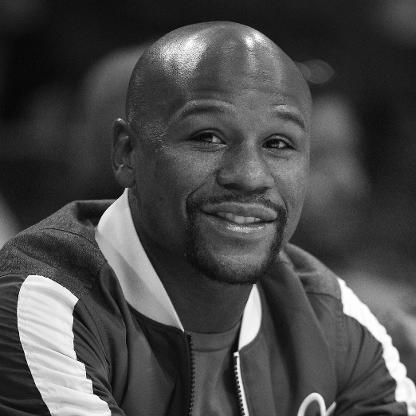

In [3]:
# Import PIL library
from PIL import Image

# Convert to PIL image
pil_image = Image.fromarray(gray_image)
# Display image
display(pil_image)

Let's now use OpenCV to detect faces in this image. OpenCV provides a pre-trained classifier, called the Haar Cascade classifier, which is based on the Haar Wavelet technique to analyze pixels in the image. The Haar Cascade classifier employs a machine learning approach by training the classifier to identify object edges in specific types of images.

The first step is to load the classifier XML file, which contains the classifier definition. This file is available in the OpenCV GitHub repository. We will use the cv2.CascadeClassifier method to load the XML file.

In [4]:
# Import OpenCV library and Image and ImageDraw libraries from PIL
import cv2 as cv
from PIL import Image, ImageDraw
import numpy as np

# Load XML classifier
face_cascade = cv.CascadeClassifier('classifier/haarcascade_frontalface_default.xml')
eye_cascade = cv.CascadeClassifier('classifier/haarcascade_eye.xml')

# With the classifier loaded, we can now use it to detect faces in the image.
# Load the image and convert it to grayscale
image = cv.imread('images/floyd.jpg')
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
# Use classifier to detect faces. This function returns a list of objects as rectangles. The first parameter is an ndarray of the image.
faces = face_cascade.detectMultiScale(gray_image)
print(faces.tolist()[0]) # tolsit() converts the ndarray to a list

[158, 75, 176, 176]


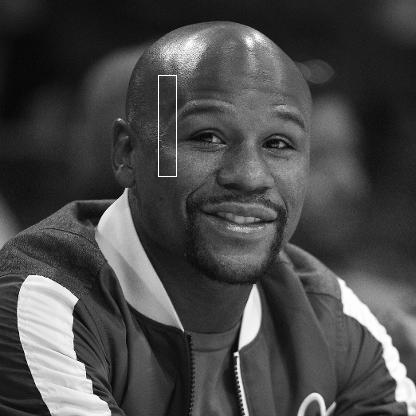

In [5]:
# Let's draw a rectangle around the face.
# First, convert the image to a PIL image
pil_image = Image.fromarray(gray_image, mode='L')

# Draw the rectangle
draw = ImageDraw.Draw(pil_image)
rectangle = faces.tolist()[0]
draw.rectangle(rectangle, outline='white')

# Display the image
display(pil_image)

The result is not very good. 

If we check the OpenCV docs, detectMultiScale() returns the coordinates of the detected faces as a rectangle. The first two numbers are the top left corner of the rectangle, and the next two numbers are the width and height (x,y,w,h), while PIL.ImageDraw.Draw.rectangle() expects the coordinates of the top left and bottom right corners of the rectangle (x,y,x+w,y+h). So we need to convert the coordinates before we can draw the rectangle.

Let's wrap all together.

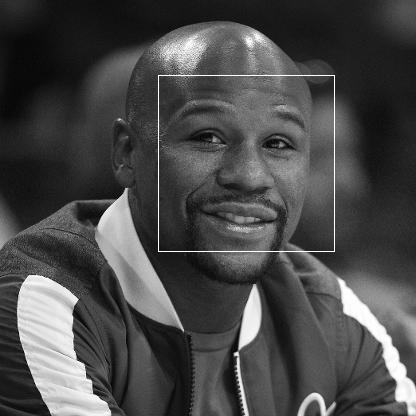

In [6]:
# Import OpenCV library and Image and ImageDraw libraries from PIL
import cv2 as cv
from PIL import Image, ImageDraw

# Load XML classifier
face_cascade = cv.CascadeClassifier('classifier/haarcascade_frontalface_default.xml')
eye_cascade = cv.CascadeClassifier('classifier/haarcascade_eye.xml')

# With the classifier loaded, we can now use it to detect faces in the image.
# Load the image and convert it to grayscale
image = cv.imread('images/floyd.jpg')
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
# Use classifier to detect faces. This function returns a list of objects as rectangles. The first parameter is an ndarray of the image.
faces = face_cascade.detectMultiScale(gray_image)

# Let's draw a rectangle around the face.
# First, convert the image to a PIL image
pil_image = Image.fromarray(gray_image, mode='L')
# Draw the rectangle
draw = ImageDraw.Draw(pil_image)
rectangle = faces.tolist()[0]
draw.rectangle((rectangle[0], rectangle[1], rectangle[0]+rectangle[2], rectangle[1]+rectangle[3]), outline='white')

# Display the image
display(pil_image)

We see the face detection works pretty good on this image! Note that it's apparent that this is not head detection, but that the haarcascades file we used is looking for eyes and a mouth.

### Multiple Face Detection

Now let's try to detect faces in a group photo. We will use the same technique as before.

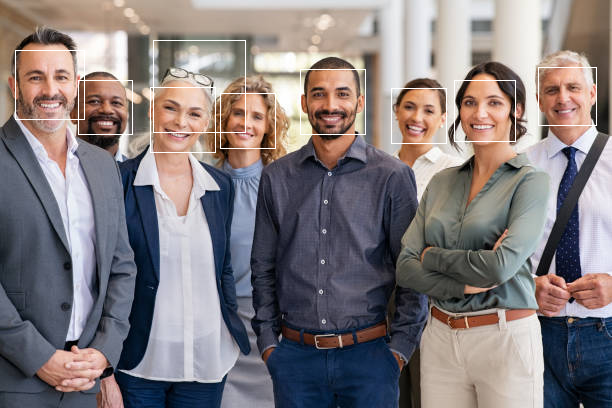

In [7]:
import cv2 as cv
from PIL import Image, ImageDraw

# Load XML classifier
face_cascade = cv.CascadeClassifier('classifier/haarcascade_frontalface_default.xml')
eye_cascade = cv.CascadeClassifier('classifier/haarcascade_eye.xml')

# Load the image
group_image = cv.imread('images/group_of_people.jpg')
# Convert to grayscale
gray_group_image = cv.cvtColor(group_image, cv.COLOR_BGR2GRAY)
# Detect faces
faces = face_cascade.detectMultiScale(gray_group_image)

# Draw rectangle around faces
pil_image = Image.open('images/group_of_people.jpg').convert('RGB')
draw = ImageDraw.Draw(pil_image)
for x,y,w,h in faces:
    draw.rectangle((x,y,x+w,y+h), outline='white')
display(pil_image)

Awesome! Looks like there are one false positive - something the machine thought was a face but it wasn't.
It could also happen in other cases that the machine thinks there is no face but there is one - a false negative. In this case, we have no false negative.

There are a few ways we could try and improve this, and really, it requires a lot of experimentation to find good values for a given image.
First, lets create a function which will plot rectanges for us over the image

In [8]:
def show_rects(faces):
    """
    Function to draw rectangles around faces
    :param faces: list of faces as rectangles
    :return: None
    """
    # Open image
    pil_image = Image.open('images/group_of_people.jpg').convert('RGB')
    # Draw rectangle around faces
    draw = ImageDraw.Draw(pil_image)
    for x,y,w,h in faces:
        draw.rectangle((x,y,x+w,y+h), outline='white')
    # Display image
    display(pil_image)

The **detectMultiScale()** function from OpenCV has a couple of parameters which control the detection of faces. 
The first is the **scaleFactor**, which specifies how much the image size is reduced at each image scale. This value is used to create the scale pyramid in order to detect faces at multiple scales in the image (some faces may be closer to the foreground, and thus be larger, other faces may be smaller and in the background, thus the usage of varying scales). A value of 1.05 indicates that the image is scaled down by 5% each time it is scaled. Smaller values, like 1.03, will take longer to compute, but will increase the rate of detection.

Scale factor 1.05


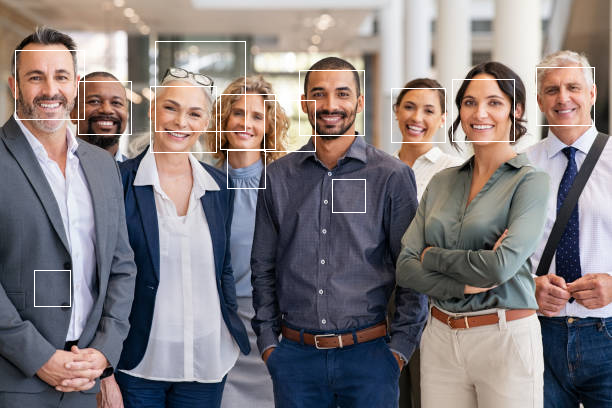

Scale factor 1.15


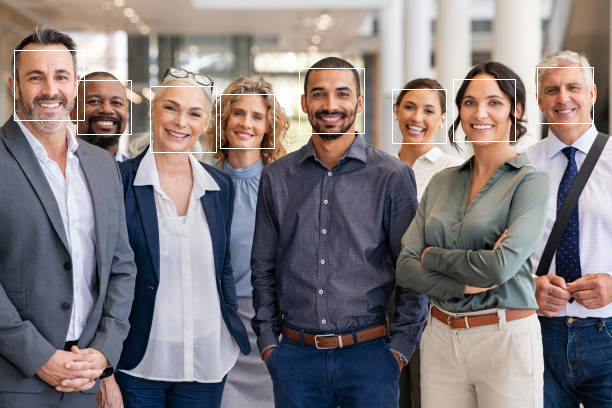

Scale factor 1.25


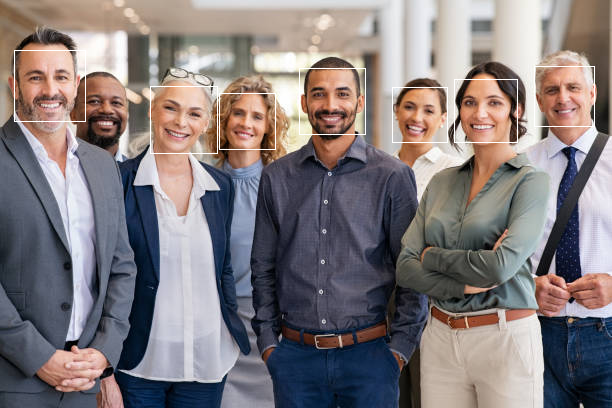

In [9]:
# Lets experiment with the scale factor. Usually it's a small value, lets try 1.05
print("Scale factor 1.05")
faces = face_cascade.detectMultiScale(gray_group_image,1.05)
# Show those results
show_rects(faces)
# Now lets also try 1.15
print("Scale factor 1.15")
faces = face_cascade.detectMultiScale(gray_group_image,1.15)
# Show those results
show_rects(faces)
# Finally lets also try 1.25
print("Scale factor 1.25")
faces = face_cascade.detectMultiScale(gray_group_image,1.25)
# Show those results
show_rects(faces)

We can see that as we change the scale factor we change the number of true and false positives and negatives. 
 - With the scale set to 1.05, we have 8 true positives, which are correctly identified faces, and 5 false positives, where are non-faces which opencv thinks are faces. 
 - When we change this to 1.15 we lose all the false positives.
 - And when we change this to 1.25 we get 1 false negative, where opencv thinks there is no face but there is one.

This is actually a really interesting phenomena in machine learning and artificial intelligence. There is a trade off between not only how accurate a model is, but how the inaccuracy actually happens. Which of these three models do you think is best?

Well, the answer to that question is really, "it depends". It depends why you are trying to detect faces, and what you are going to do with them. 
Did you notice anything else that happened when we changed the scale factor? It's subtle, but the speed at which the processing ran took longer at smaller scale factors. This is because more subimages are being considered for these scales. This could also affect which method we might use.

Jupyter has nice support for timing commands. You might have seen this before, a line that starts with a percentage sign in jupyter is called a "magic function". This isn't normal python - it's actually a shorthand way of writing a function which Jupyter has predefined. In this case, we are using the timeit magic function, which will run the command a few times and give us the best, average, and worst times.

In [10]:
# Lets time the speed of detectmultiscale when using a scale of 1.05
print("Scale factor 1.05")
%timeit face_cascade.detectMultiScale(gray_group_image,1.05)
# Now lets also try 1.15
print("Scale factor 1.15")
%timeit face_cascade.detectMultiScale(gray_group_image,1.15)

Scale factor 1.05
202 ms ± 24.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Scale factor 1.15
72.1 ms ± 3.2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


You can see that this is a dramatic difference, almost three times slowerwhen using the smaller scale!

You'll see that, like OCR, this is not a foolproof process. But we can build on the work others have done in machine learning and leverage powerful libraries to bring us closer to building a turn key python-based solution. Remember that the detection mechanism isn't specific to faces, that's just the haarcascades training data we used.